In [1]:
import pandas as pd
import seaborn as sns
import os
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import urllib.request, urllib.error, urllib.parse
from datetime import datetime
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from googlesearch import search
import nltk
from string import digits

In [2]:
dataset_path = "G:\\DEBI\\uOttowa\\AI for CS\\Project Data\\Original"
websites_info_file = os.path.join(dataset_path,'ID__URLs_labell.csv')
websites_info_df = pd.read_csv(websites_info_file)
saved_html_path = dataset_path + '\\sourc_Data(D1)'

In [3]:
websites_info_df.head(10)

,id,url,typ
0,5535,10bestbingorooms.com,1
1,5704,10stepstostartingyouronlinebusiness.com,1
2,5705,10surdix.com,1
3,6123,116-region.ru/wp-includes/capitalone360/fe3ffa...,1
4,6124,116-region.ru/wp-includes/capitalone360/fe3ffa...,1
5,6125,116-region.ru/wp-includes/capitalone360/fe3ffa...,1
6,6161,117.me,1
7,6253,118usa.com,1
8,6785,123appliancerepair.com/images/_notes/login.htm...,1
9,6814,123contactform.com/form-2172199/yahoo\t\n,1


# Data Exploration

In [4]:
websites_info_df.shape

(60252, 3)

In [5]:
websites_info_df.nunique()

id     60252
url    60240
typ        2
dtype: int64

# Data preparation

**Appending 'http://' to the begining of every record to avoid parsing errors**

In [6]:
websites_info_df['url'] = 'http://' + websites_info_df['url'].astype(str)

**checking how many urls ends with '\n' or '\t'**

In [7]:
websites_info_df['url'].str.endswith('\t\n').value_counts()

False    42959
True     17293
Name: url, dtype: int64

Remove '\t\n' from url since it was probably added by mistake

In [8]:
websites_info_df['url'] = websites_info_df['url'].replace(r'\t\n',' ', regex=True) 
websites_info_df['url'].str.endswith('\t\n').value_counts()

False    60252
Name: url, dtype: int64

**Replace '-1' with '0' in typ**

In [9]:
websites_info_df['typ'].replace(-1,0,inplace=True)

**Dropping duplicate urls**

In [10]:
websites_info_unique_df = websites_info_df.drop_duplicates(subset=["url"], keep=False)
print(str(len(websites_info_unique_df)))
websites_info_unique_df.nunique()

60228


id     60228
url    60228
typ        2
dtype: int64

**checking that all the urls have corresponding valid html page downloaded**

In [47]:
def downlod_html_page(url,file_name,path):
    
    response = urllib.request.urlopen(url,timeout=30)
    webContent = response.read().decode('UTF-8')

    with open(os.path.join(path, file_name +".txt"), "w",encoding='UTF-8') as text_file:
        #write string to file
        text_file.write(webContent.strip())

url_ids_lst=[]

for _,url_info in websites_info_unique_df.iterrows():
    hrml_file_path = saved_html_path + "\\" + str(url_info['id']) + ".txt"
    
    if os.path.exists(hrml_file_path):
        #check that it is a valid html file
        with open(hrml_file_path , "r",encoding="UTF-8") as HTMLFile:
            # Reading the file
            if bool(BeautifulSoup(HTMLFile.read(), "html.parser").find()):
                url_ids_lst.append(url_info['id'])
            else:
                print(f'File {hrml_file_path} does not contain valid html')    
    else:
        print(f'File {hrml_file_path} does not exist')
        print('Trying to download missing file')
        try:
            downlod_html_page(url_info['url'],str(url_info['id']),saved_html_path)
            url_ids_lst.append(url_info['id'])
        except Exception as e:
            print(f"{'-'*50}")
            print(f"Failed to download html page for row: {str(url_info['id'])},url={url_info['url']}")
            print(str(e))
            print(f"{'-'*50}")
            continue


File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\7069.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\21618.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\27149.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\27150.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\25635.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\28213.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\34995.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\51453.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\52259.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Ori

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136181.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136182.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136228.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136450.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136451.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136452.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136453.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136455.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1136456.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

--------------------------------------------------
Failed to download html page for row: 1174618,url=http://previewgeorgiahomes.com/blog/category/uncategorized 
<urlopen error [Errno 11001] getaddrinfo failed>
--------------------------------------------------
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1174619.txt does not exist
Trying to download missing file
--------------------------------------------------
Failed to download html page for row: 1174619,url=http://previewgeorgiahomes.com/blog/uncategorized/attorneys-fearnley-califf-price-will-be-at-remax-unlimited.html 
<urlopen error [Errno 11001] getaddrinfo failed>
--------------------------------------------------
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1175497.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1175695.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1175876.txt 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1194726.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1197802.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1199404.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1199405.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1200381.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1202763.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1204699.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1204910.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1205075.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1241020.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1242268.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1242825.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1242826.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1242827.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1242935.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1242441.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1243707.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1245566.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1268972.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1268741.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1269059.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1269060.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1270714.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1271711.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1271837.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1274239.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1274426.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1320266.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1320316.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1320633.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1321164.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1322767.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1323173.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1323177.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1323180.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1323928.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1356043.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1356044.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1356450.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1358126.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1363484.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1363538.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1364044.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1365871.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1366603.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425978.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425994.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425995.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425996.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425997.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425998.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1425999.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1426000.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1426001.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1460524.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1461606.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1461621.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1461622.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1462947.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1465555.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1466813.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1468141.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1468586.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1513918.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1513955.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1514208.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1514883.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1515924.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1519019.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1520405.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1522156.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1524095.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577322.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577803.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577323.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577800.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577801.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577802.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577804.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577805.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1577806.txt does not contain valid html
File G:\DEBI\uOttowa\AI for 

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1725015.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1725143.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1725319.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1729746.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1253.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1254.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1255.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\47491.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\49267.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Da

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\106941.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\107084.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\107468.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\107599.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\107602.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\116033.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\116767.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\116769.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\116770.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\151992.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\151993.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\151994.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\151995.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\151996.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\152194.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\152192.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\152193.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\152198.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186196.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186197.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186198.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186383.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186565.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186863.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186897.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\186898.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\187336.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\222180.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\222981.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\223079.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\238287.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\223134.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\232017.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\232064.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\232625.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\233397.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\2536.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1731074.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1731092.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1731746.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1731611.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1731693.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1732119.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1732338.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\1732537.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\18698.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\18972.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\19657.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\19774.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\19778.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\19799.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\20575.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\20579.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\20606.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Or

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\45652.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\46132.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\46307.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\47532.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\46991.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\47160.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\47230.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\47270.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\47335.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Or

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\70396.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\70397.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\71159.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\142232.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\71917.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\72252.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\72534.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\72540.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\72655.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\O

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\89870.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\87762.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\87608.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\87802.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\87850.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\88744.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\88101.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\88208.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\88508.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Or

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101580.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101681.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101682.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101683.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101684.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101685.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101686.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101687.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\101688.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\108996.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\108997.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\108998.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\109000.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\109001.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\109002.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\109003.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\109004.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\109005.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\117928.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\117934.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\118573.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\118646.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\118746.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\119210.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\119563.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\119594.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\119996.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146138.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146182.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146196.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146255.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146350.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146480.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146496.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146503.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\146510.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\165500.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\165573.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\165717.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\165718.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\166881.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\166884.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\169915.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\167236.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\167431.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\181833.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\181834.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\181878.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\182638.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\182640.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\182641.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\182642.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\182643.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\182644.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\191481.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\192183.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\191685.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\191896.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\192096.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\192439.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\192507.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\192672.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\193246.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\210276.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\210284.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\212460.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\210318.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\210487.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\210898.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\210909.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\211025.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\211104.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\235043.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\235538.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\235829.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\236322.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\236453.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\240253.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\237595.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\238022.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\239865.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440611.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440613.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440614.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440616.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440620.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440622.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440625.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440626.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\440627.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\464164.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\462947.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\463155.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\463607.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\463608.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\463609.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\463610.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\463611.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\468977.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\514861.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\515037.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\516420.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\519067.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\519540.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\520070.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\520501.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\521290.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\522527.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\288805.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\288806.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\290802.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\289270.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\289271.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\289410.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\289782.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\290804.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\290811.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325851.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325887.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325888.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325889.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325890.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325891.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325892.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325893.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\325894.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\366751.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\365747.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\366059.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\366060.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\366686.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\371278.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\371280.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\373268.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\371480.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\403551.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\403969.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\403970.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\403971.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\406798.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\406799.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\406800.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\407520.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Project Data\Original\sourc_Data(D1)\408074.txt does not contain valid html
File G:\DEBI\uOttowa\AI for CS\Projec

Keeping only urls that have a valid downloaded html pages 

In [36]:

filtered_data_df = websites_info_unique_df.loc[websites_info_unique_df['id'].isin(url_ids_lst)]
print(filtered_data_df.shape)
filtered_data_df
filtered_data_df.to_csv('filtered_data.csv',index=False)

(57282, 3)


# Data Visualization

## Classes count

In [17]:
filtered_data_df['typ'].value_counts()

0    31857
1    25425
Name: typ, dtype: int64

<AxesSubplot: xlabel='typ', ylabel='count'>

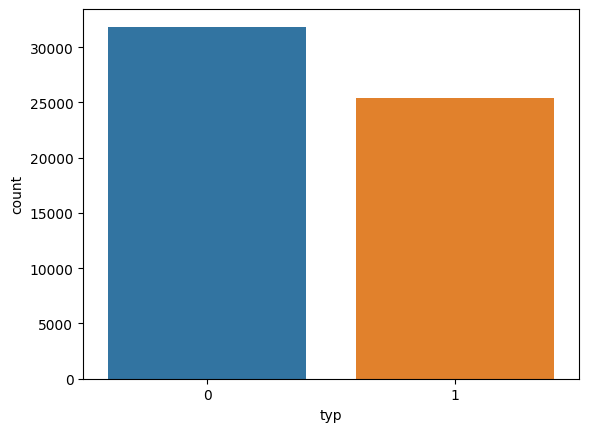

In [18]:
sns.countplot(x ='typ', data = filtered_data_df)

- **Classes count is similar, so the data is not imbalanced**
- **The target class that represents phishing websites is '1'**

## Wordcloud for urls

In [19]:
phishing_URLs = filtered_data_df[filtered_data_df.typ == 1]
Benign_URLs = filtered_data_df[filtered_data_df.typ == 0]

**word cloud for phising websites urls**

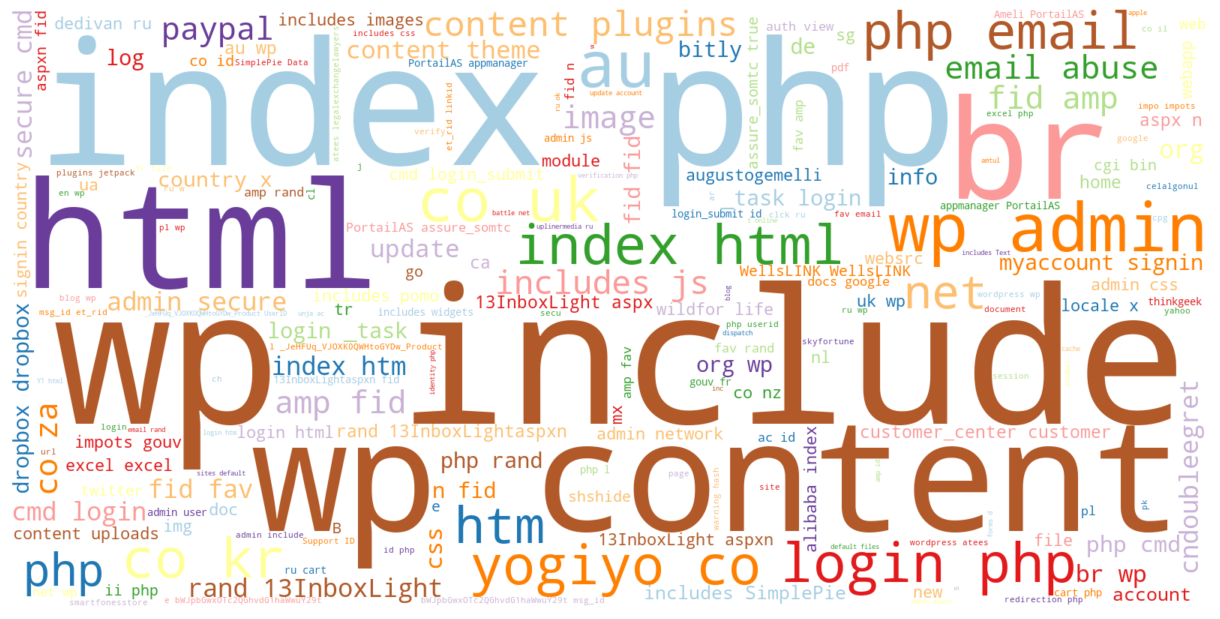

In [20]:
phish = " ".join(i for i in phishing_URLs.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired',background_color="white").generate(phish)
plt.figure( figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**wordcloud for benign websites url**

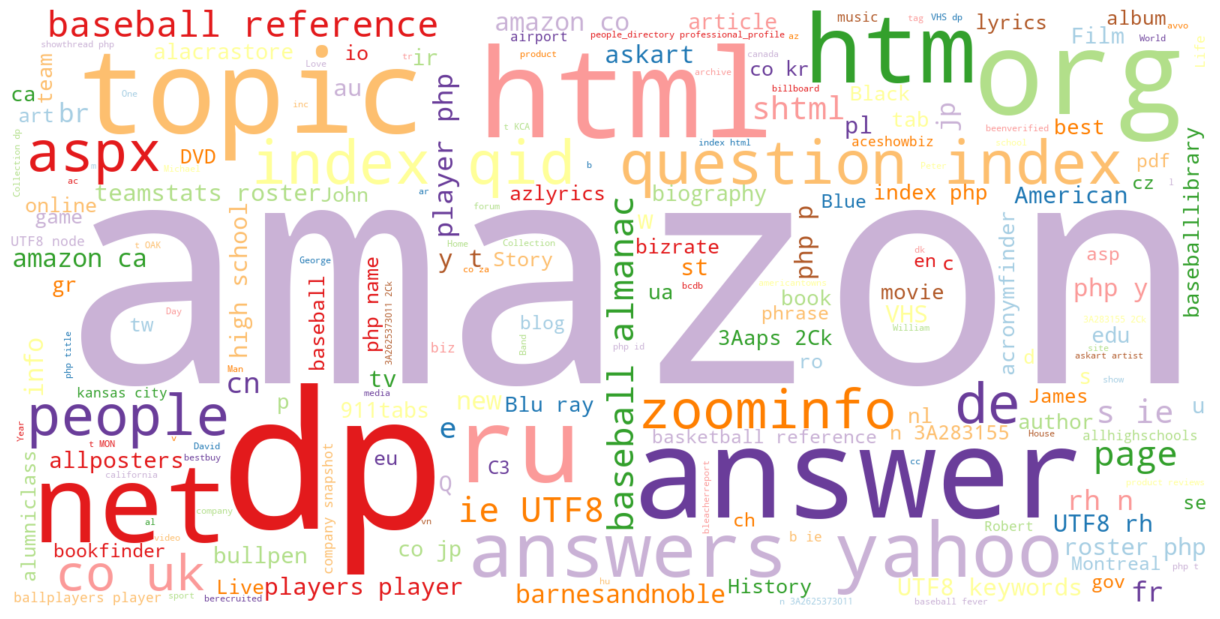

In [21]:
benign= " ".join(i for i in Benign_URLs.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired',background_color="white").generate(benign)
plt.figure( figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Features Extraction

In [37]:

data = pd.read_csv('filtered_data.csv')
data

,id,url,typ
0,5535,http://10bestbingorooms.com,1
1,5704,http://10stepstostartingyouronlinebusiness.com,1
2,5705,http://10surdix.com,1
3,6123,http://116-region.ru/wp-includes/capitalone360...,1
4,6124,http://116-region.ru/wp-includes/capitalone360...,1
...,...,...,...
57277,439417,http://drevalair.com/wp-includes/images,1
57278,439497,http://drewwestcott.com/zeta/DROPBOXSECURE/sj/...,1
57279,439531,http://dreyfusashby.com/docs/324/2011/it/,1
57280,439532,http://dreyfusashby.com/italy/,1


## URL features

In [30]:
def ip_address(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip

def count_dot(url):
    count_dot =url.count('.')
    return count_dot

def sign_at(url):
    return url.count('@')


def google_search(url):
    site = search(url, 10)
    return 1 if site else 0


def num_director(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def num_embed_domain(url):
    urldir = urlparse(url).path
    return urldir.count('//')


def num_digits(url):
    dig = [x for x in url if x.isdigit()]
    return len(dig)


def len_url(url):
    return len(url)

def num_parameter(url):
    parameter = url.split('&')
    return len(parameter) - 1

def num_fragments(url):
    fragment = url.split('#')
    return len(fragment) - 1


def has_https(url):
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0

def pref_suf(url):
    if '-' in urlparse(url).netloc:
        return 1            
    else:
        return 0

#Function to extract features
def feature_extraction(url):
    features = []
    features.append(ip_address(url))
    features.append(count_dot(url))
    features.append(sign_at(url))
    features.append(google_search(url))
    features.append(num_director(url))
    features.append(num_embed_domain(url))
    features.append(num_digits(url))
    features.append(len_url(url))
    features.append(num_parameter(url)) 
    features.append(num_fragments(url)) 
#     features.append(has_https(url)) 
    features.append(pref_suf(url)) 
    return features

In [31]:
features_extracted_d = []

for _,url_info in data.iterrows():
    url = url_info.url
    features_extracted_d.append(feature_extraction(url))
    

feature_names = ['ip_address', 'count_dot', 'sign_at',  'google_search','num_director','num_embed_domain', 'num_digits','len_url','num_parameter','num_fragments','pref_suf']
url_features_df = pd.DataFrame(features_extracted_d, columns= feature_names)
url_features_df

,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf
0,0,1,0,1,0,0,2,27,0,0,0
1,0,1,0,1,0,0,2,46,0,0,0
2,0,1,0,1,0,0,2,19,0,0,0
3,0,1,0,1,4,0,18,80,0,0,1
4,0,2,0,1,4,0,18,89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
57277,0,1,0,1,2,0,0,40,0,0,0
57278,0,2,0,1,5,0,0,63,0,0,0
57279,0,1,0,1,5,0,7,42,0,0,0
57280,0,1,0,1,2,0,0,31,0,0,0


In [32]:
final_data = pd.concat([data,url_features_df],axis = 1)
final_data.to_csv('url_features.csv',index=False)

## HTML features

**Extracting id column to be able to join the url with html features if needed**

In [63]:
def get_html_features(page_id):
    paragraph_lst = []
    links_lst = []
    headings_lst = []
    titles_lst = []
    
    hrml_file_path = saved_html_path + "\\" + str(url_info['id']) + ".txt"
    with open(hrml_file_path , "r",encoding="UTF-8") as HTMLFile:
        # Creating a BeautifulSoup object and specifying the parser
        soup = BeautifulSoup(HTMLFile.read(), 'lxml')
        
        for paragraph in soup.find_all('p'):
            if paragraph.getText().strip() != "":
                paragraph_lst.append(paragraph.getText().strip())
        
        for link in soup.find_all('a'):
            if link.get('href') is not None and link.getText() is not None and link.get('href').strip() != "#" and link.getText().strip() != "":
                links_lst.append(link.get('href').strip())
         
        for heading in soup.find_all(re.compile("^h[1-6]$")):
            headings_lst.append(heading.getText().strip())
            
        for title in soup.find_all('title'):
            titles_lst.append(title.getText().strip())
        
    return paragraph_lst,links_lst,headings_lst,titles_lst
       

In [67]:
html_features_df = pd.DataFrame()
html_features_df['id'] = data.id.values.copy()

html_pages_paragraphs = []
html_pages_links = []
html_pages_headings = []
html_pages_titles = []

start = datetime.now()
for _,url_info in html_features_df.iterrows():
    page_para,page_links,page_heading,page_title = get_html_features(url_info['id'])
    html_pages_paragraphs.append(page_para)
    html_pages_links.append(page_links)
    html_pages_headings.append(page_heading)
    html_pages_titles.append(page_title)
    
html_features_df['para_content'] = html_pages_paragraphs
html_features_df['links'] = html_pages_links
html_features_df['headings'] = html_pages_headings
html_features_df['titles'] = html_pages_titles

end = datetime.now()
formatted_time = "{:.2f}".format((end - start).total_seconds()/60)
print(f'extracting feature finished in {formatted_time} minutes')

C:\Users\esraa\anaconda3\envs\CV\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.


extracting feature finished in 70.67 minutes


In [71]:
html_features_df['domain_name'] = data['url'].apply(lambda url: urlparse(url).netloc)
html_features_df.head()

,id,para_content,links,headings,titles,domain_name
0,5535,[has selected the best bingo rooms considering...,"[http://www.10bestonlinecasinos.net/, http://w...","[10BestBingoRooms.com, Deposit £10 and get £40...",[10 Best Bingo Rooms :: Only the best online b...,10bestbingorooms.com
1,5704,"[Hi there. I'm Connie Ragen Green, and I've be...","[http://fromideatoebook.com/warranties.htm, ht...","[""Can You Really Start Your Online BusinessIn ...",[Connie Ragen Green | Starting An Online Busin...,10stepstostartingyouronlinebusiness.com
2,5705,"[Accédez à notre, E-SHOP, 10, rue Cassette- 75...","[https://www.10surdix.com/contact/, https://ww...","[Contact, Accueil, ARCHITECTE D’INTÉRIEUR PARI...",[[10surdix] Architecte d’intérieur Paris & Sho...,10surdix.com
3,6123,[Попробуйте использовать нашу поисковую форму ...,[https://116-region.ru/%d0%ba%d0%b0%d1%80%d1%8...,"[Ой! Такой страницы похоже не существует., Арх...",[Page not found!],116-region.ru
4,6124,[Попробуйте использовать нашу поисковую форму ...,[https://116-region.ru/%d0%ba%d0%b0%d1%80%d1%8...,"[Ой! Такой страницы похоже не существует., Арх...",[Page not found!],116-region.ru


**Couting the number of occurence of domain name in html content**

In [96]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

domain_occ_counts=[]
lem = nltk.stem.wordnet.WordNetLemmatizer()
remove_digits = str.maketrans('', '', digits)

#counting the number of occuernces of domain name in html content
for _,url_info in html_features_df.iterrows():
    count = 0
    if not isfloat(url_info['domain_name']):
        domain_name = url_info['domain_name'].split('.')[0]
        char_only_domain_name = domain_name.translate(remove_digits)
        lem_domain_name = lem.lemmatize(char_only_domain_name)
        
        for para in url_info.para_content:
            count += para.count(lem_domain_name)    
        for heading in url_info.headings:
            count += para.count(lem_domain_name)
        for title in url_info.titles:
            count += para.count(domain_name)
            
    domain_occ_counts.append(count)

html_features_df['domain_occ_count'] = domain_occ_counts

In [100]:
html_features_df['typ']=data.typ

In [101]:
html_features_df.head()

,id,para_content,links,headings,titles,domain_name,domain_occ_count,typ
0,5535,[has selected the best bingo rooms considering...,"[http://www.10bestonlinecasinos.net/, http://w...","[10BestBingoRooms.com, Deposit £10 and get £40...",[10 Best Bingo Rooms :: Only the best online b...,10bestbingorooms.com,72,1.0
1,5704,"[Hi there. I'm Connie Ragen Green, and I've be...","[http://fromideatoebook.com/warranties.htm, ht...","[""Can You Really Start Your Online BusinessIn ...",[Connie Ragen Green | Starting An Online Busin...,10stepstostartingyouronlinebusiness.com,0,1.0
2,5705,"[Accédez à notre, E-SHOP, 10, rue Cassette- 75...","[https://www.10surdix.com/contact/, https://ww...","[Contact, Accueil, ARCHITECTE D’INTÉRIEUR PARI...",[[10surdix] Architecte d’intérieur Paris & Sho...,10surdix.com,0,1.0
3,6123,[Попробуйте использовать нашу поисковую форму ...,[https://116-region.ru/%d0%ba%d0%b0%d1%80%d1%8...,"[Ой! Такой страницы похоже не существует., Арх...",[Page not found!],116-region.ru,0,1.0
4,6124,[Попробуйте использовать нашу поисковую форму ...,[https://116-region.ru/%d0%ba%d0%b0%d1%80%d1%8...,"[Ой! Такой страницы похоже не существует., Арх...",[Page not found!],116-region.ru,0,1.0


**Saving the features to a dataframe**

In [102]:
html_features_df.to_csv('html_features.csv',index=False)

In [34]:
test_df=pd.read_csv('url_features.csv')
test_df

,index,id,url,typ,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf
0,0,5535,http://10bestbingorooms.com,1,0,1,0,1,0,0,2,27,0,0,0
1,1,5704,http://10stepstostartingyouronlinebusiness.com,1,0,1,0,1,0,0,2,46,0,0,0
2,2,5705,http://10surdix.com,1,0,1,0,1,0,0,2,19,0,0,0
3,3,6123,http://116-region.ru/wp-includes/capitalone360...,1,0,1,0,1,4,0,18,80,0,0,1
4,4,6124,http://116-region.ru/wp-includes/capitalone360...,1,0,2,0,1,4,0,18,89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57277,60247,439417,http://drevalair.com/wp-includes/images,1,0,1,0,1,2,0,0,40,0,0,0
57278,60248,439497,http://drewwestcott.com/zeta/DROPBOXSECURE/sj/...,1,0,2,0,1,5,0,0,63,0,0,0
57279,60249,439531,http://dreyfusashby.com/docs/324/2011/it/,1,0,1,0,1,5,0,7,42,0,0,0
57280,60250,439532,http://dreyfusashby.com/italy/,1,0,1,0,1,2,0,0,31,0,0,0
